# Explore Four Datasets

Here, four datasets are explored: USPS Vacancy, HUD Subsidized Housing Data, Employment data, and NC Statewide Parcels.

### Questions of interest:
- How is the data accessed (freely available or by special request, requires special status, etc.)?
- Data frequency (Daily/Monthly/Annually/Other)
- Data lag (e.g. data may be annual – but there may be a lag of 2 years before it is available)
- Are data “complete” when published or are there usually revisions after publication?
- If revised, how often and at what point are data “final”?
- Source of data (administrative records, sample survey, etc.)
- What portion of the population does this cover?  (not necessarily a specific percentage – but as an example, vehicle registration only covers those who own a vehicle and register it – so not a complete coverage of the population)
- Characteristics provided in the data (e.g. do the data provide demographic characteristics such as race, ethnicity, gender, age)?
- Other limitations
- General description
- Cost

## USPS Vacancy

- [Data Description](https://www.huduser.gov/portal/datasets/usps.html)
- [FAQs](https://www.huduser.gov/portal/sites/default/files/pdf/2018-USPS-FAQ.pdf)

### Reflections

- Data access is free, but restricted. Application is required to access data, but the process is fast and relatively open. Any government agency or nonprofit organization is eligible to apply. Turnaround for my application was 10 days, and required information was very basic on purpose and my institution.
- Data frequency is quarterly, back to 2012 at the 2010 census tracts, and 2012 to 2005 at the 2000 census tracts.
- Data lag is not explicitly published, but currently Q4 2021 data is available, indicating less than a 1 year lag.
- Data is not revised, but there are potential inaccuracies in the geocoding, as vacancies are initially coded by Zip+4 code, and are converted to Census tract. Lag in updating of changing Zip codes can lead to geographic inaccuracies.
- Data source: Reported by USPS postal workers out on routes.
- Coverage: covers all addresses in the United States.


### Data Specifications

Data contains number of total addresses by Census tract, divided into residential and business. Data then includes various measures of vacancy including the following (all at the Census tract level):

- Total count of vacant addresses (separated into residential and business) — identified as vacant for 90 days or longer.
- Vacant count by length of vacancy: (less than 3 months, 3-6 months, 6-12 months, 12-24 months, 24-36 months, and greater than 36 months)
- Count of vacancies in the previous quarter that are now receiving active mail service.

### Potential Issues

The data is split into "Vacancy" counts and "No-Stat" counts. "No-Stat" counts are defined as vacancies that are (this list is not exclusive, addresses may also be listed as no-stat for other reasons):

- Rural Route addresses that are vacant for 90 days or longer.
- Addresses for businesses or homes under construction and not yet occupied
- Addresses in urban areas identified by a carrier as not likely to be active for some time.

This distinction could make it complicated to calculate accurate vacancy rates, as in some areas "no-stat" counts may not be appropriate to report as vacancies, while in other areas they may represent vacancies.

Continually, areas with high vacancy likely correlate to both areas with large growth and significant decline, making it more challenging to use this dataset, at least individually, to separate areas of population growth and decline.

Finally, while the data can easily be aggregated to the county level, it may be challenging to utilize at the tract level, as the tracts are at the 2010 level, and not the 2020 level.

### Data Investigation

Below, I read in the vacancy data (Q4 2021) and do some brief investigation. There are no missing values, and for ease, I aggregate the data into county level (by FIPS code), and briefly plot the residential vacancy rate by county.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

vac = pd.read_csv("../00_source_data/NC_vacancy_q4_21.csv")
vac.drop(["Unnamed: 0", "geometry"], axis=1, inplace=True)
vac["geoid"] = vac["geoid"].astype(str)
vac["county_fips"] = vac["geoid"].str[2:5]
vac = vac.groupby("county_fips", as_index=False).sum()


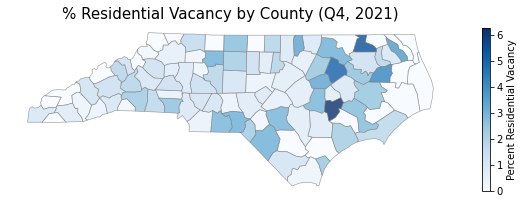

In [2]:
gdf = gpd.read_file("../00_source_data/cb_2018_us_county_20m")
gdf = gdf[gdf["STATEFP"] == "37"]
vac_geo = gdf.merge(
    vac, how="left", validate="1:1", left_on="COUNTYFP", right_on="county_fips"
)
assert vac_geo.shape[0] == 100
vac_geo["res_vac_perc"] = 100 * (vac_geo["res_vac"] / vac_geo["ams_res"])
vac_geo["res_vac_perc_no_stat"] = 100 * (
    (vac_geo["res_vac"] + vac_geo["nostat_res"]) / vac_geo["ams_res"]
)


fig, ax = plt.subplots(1, 1, figsize=(10, 20))
vac_geo.plot(
    column="res_vac_perc",
    cmap="Blues",
    legend=True,
    legend_kwds={"shrink": 0.15, "label": "Percent Residential Vacancy"},
    missing_kwds={
        "color": "grey",
        "label": "Missing values",
    },
    alpha=0.8,
    edgecolor="#808080",
    linewidth=0.6,
    ax=ax,
)
ax.set_axis_off()
ax.set_title(label="% Residential Vacancy by County (Q4, 2021)", size=15)
plt.show()


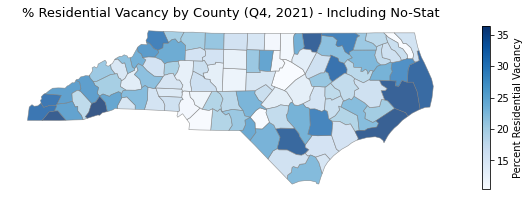

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 20))
vac_geo.plot(
    column="res_vac_perc_no_stat",
    cmap="Blues",
    legend=True,
    legend_kwds={"shrink": 0.15, "label": "Percent Residential Vacancy"},
    missing_kwds={
        "color": "grey",
        "label": "Missing values",
    },
    alpha=0.8,
    edgecolor="#808080",
    linewidth=0.6,
    ax=ax,
)
ax.set_axis_off()
ax.set_title(label="% Residential Vacancy by County (Q4, 2021) - Including No-Stat", size=13)
plt.show()


## HUD Subsidized Housing Data

- [Data Link](https://www.huduser.gov/portal/datasets/assthsg.html#2009-2021_data)
- [Data Dictionary](https://www.huduser.gov/portal/datasets/pictures/dictionary_2021.pdf)

### Reflections

- Data access is free and available for public download.
- Data frequency is annual.
- Appears that data lag is < 1 year.
- No revisions are apparent.
- Source of the data is administrative: tracts various HUD subisidized housing programs.
- Specifically, this covers those living in subsidized housing.
- Data provides other demographic information, including number of children, income, age, and race.

### Data Specifications

Data is available at many geographies, including: national, state, core based statistical areas, census tract, city, county, congressional district and zip code. Data includes total number of subsidized housing units, number of occupied units, average number of people per unit, and total people in subsidized housing units. This is available by HUD subsidized program, and overall.

Data is available with annual frequency back to 2004, and then somewhat random frequency back to 1993 (close to every other year).

### Data Limitations

The data does not include housing subsidy programs outside of the HUD programs, including other Federal programs and state/local programs. Additionally, it is challenging to find information about the source of the demographic data. It may be that certain information is more reliable than others—for example, it seems that income is likely verified as a condition for housing eligibility, but race and age are likely self-reported.

In [4]:
sub = pd.read_csv("../00_source_data/nc_subsidize_housing.csv")
sub[["name", "hh_income"]].head()

,name,hh_income
0,NC North Carolina Alamance County 020100,11431
1,NC North Carolina Alamance County 020100,11316
2,NC North Carolina Alamance County 020100,10661
3,NC North Carolina Alamance County 020100,13952
4,NC North Carolina Alamance County 020100,13547


In [5]:
subnull = sub.isnull().sum()
subnull[subnull > 0]

sub_program        5693
fedhse             5693
cbsa                283
place               283
latitude           5693
longitude          5693
pha_total_units    5693
ha_size            5693
dtype: int64

## Employment Data

- [Data Access Portal](https://d4.nccommerce.com/LausSelection.aspx)
- asd

### Reflections

- Data is accessed through portal, free of charge and available to the public. The interface is a little challenging, but workable.
- Frequency of the data is monthly, and lag is approximately 3-5 months (shorter for non-seasonally adjusted estimates).
- These estimates are subject to semi-frequent revisions, but data on when the revisions often occur is not public.
- Data are estimates published under the Local Area Unemployment Statistics (LAUS) program, which is a collaboration between the North Carolina Department of Commerce and the Bureau of Labor Statistics (BLS).
- This source covers the labor force in North Carolina.

### Data Specifications

Data is available monthly at the state, county, city, MSA, and CSA level. Data is available back to 1976, and with the following specifications:

- Labor Force (#)
- Employed (#)
- Unemployed (#)
- Unemployment Rate (%)
- Labor Force Participation (%)
- Employment to Population (%)

### Data Limitations

Many of the percentage numbers are based on population estimates from the Census, so they cannot be used as independent checks on population. In turn, the raw numbers may also be somewhat reliant on Census data.

## NC Statewide Parcels

- [Data Link](https://www.nconemap.gov/pages/parcels)

### Reflections

- Data is available for visualization and download for free (publically available).
- Data is live, reported as it comes in. This means that counties have different data lags. Currently, approximately 10 counties have data updated within 2 weeks, but some counties have data that is more than a year old. The request from the state is that data is updated at least quarterly, but this is not always met.
- Data is collected at the County level, and compiled by the county GIS manager. 
- Data covers all land parcels that are owned, privately or publically.

### Data Specifications

Data is available in several GIS-friendly formats, including GeoJSON, Shapefile, and csv. It is downloadable at the county level, or at the full state level.

The parcel polygons contain significant amounts of information about who owns the parcel, purchase date, parcel purpose, and tax information.

### Limitations

Unfortuantely, there are significant challenges to working with this data. First of all, it is incredibly large,  6 GB, which is likely to large to work with on a local machine. This means that analysis would have to be conducted at the county level, or smaller, and then aggregated into one summary. 

Second of all, while there is a state standard for reporting information, it is not required for the counties to follow this standard. As such, there is massive variability in the information that is reported for parcels by county (and even seemingly within counties).


